In [4]:
from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward,dendrogram
import matplotlib as mpl
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavania\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pavania\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)

In [12]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pavania\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'WordNetLemmatizer' is not defined

In [ ]:
categories =['misc.forsale','sci.electronics','talk.religion.misc']
news_data = fetch_20newsgroups(subset = 'train',categories =categories,\
                              shuffle = True ,random_state = 42 ,download_if_missing = True)

In [ ]:
news_data['data'][:5]

In [ ]:
news_data.target

In [ ]:
Counter(news_data.target)

In [ ]:
news_data.target_names

In [ ]:
news_data_df = pd.DataFrame({'text':news_data['data'],'category':news_data.target})
news_data_df.head()

In [ ]:
news_data_df['category'].value_counts()

In [ ]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
    lambda x : ' '.join([lemmatizer.lemmatize(word.lower())\
        for word in word_tokenize(re.sub(r'([^\s\w]|)+',' ',str(x))) if word.lower() not in stop_words]))

In [ ]:
news_data_df.shape

In [ ]:
tfidf_model = TfidVectorizer(max_features = 200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

In [ ]:
dist = 1 - cosine_similarity(tfidf_df)
linkage_matrix = ward(dist)

Text(0, 0.5, 'distance')

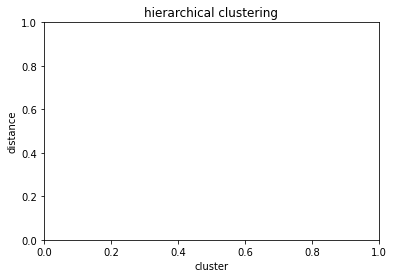

In [13]:
plt.title('hierarchical clustering')
plt.xlabel('cluster')
plt.ylabel('distance')
dendrogram(
linkage_matrix,
truncate_mode = 'lastp',
p=4,
leaf_rotation=90.,
leaf_font_size=12.
)
plt.show()

In [ ]:
k=4
clusters = fcluster(linkage_matrix, k,criterion ='maxclust')
clusters

In [14]:
news_data_df['obtained_clusters'] = clusters

NameError: name 'clusters' is not defined

In [ ]:
pd.crosstab(news_data_df['category'].replace({0:'misc.forsale',1:'sci.electronics',2:'talk.religion.misc'}),\
           news_data_df['obatined_clusters'].\
           replace({1:'cluster_1',2:'cluster_2',3:'cluster_3'}))